# <font color="blue">1.Clustering</font>
## 1) 데이터 수집
- 데이터는 UCI Machine Learning Repisitory의 'Wine' Data Set을 사용하였다.(https://archive.ics.uci.edu/ml/datasets/Wine)
- 해당 데이터는 서로 다른 3가지 재배종에 의해서 생성된 와인에 대하여 각각의 와인에 포함된 13가지 화학 성분의 양을 기록한 데이터 이다. 178가지의 서로 다른 와인 종류가 존재하며, 와인 생성에 사용된 3가지 재배종에 의해서 분류 된다. 이때 각 종에 대한 와인의 개수는 각각 59,71,48개이다.

## 2) 데이터 전처리

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
import collections
import mglearn
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib as mlp
import warnings
import random
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
import seaborn as sns


warnings.filterwarnings(action='ignore') 

random.seed(2022)

데이터가 CSV로 되어있지 않아 추가적인 수정을 통해서 wine.data를 만들었다
Classify 항목은 사용된 품종에 관한 정보로 해당 과제에서 target이 되므로 미리 drop하여 df_rabel로 저장해 두었다
- Alchol : 알콜 농도
- Malic acid : 말산. 포도주의 시큼한 맛에 기여. 포도 열매가 성숙해 감에 따라 감소하는 경향을 보임
- Ash : 음식물 속에 들어있는 무기물, 혹은 그것의 전체 분량에 대한 비율을 이루는 용어
- Alcalinity of ash : 알칼리성 무기물
- Magnesium : 마그네슘 
- Total phenols : 페놀의 총량. 와인에는 다양한 종류의 페놀성 화학 성분이 포함되어 있으며, 이는 와인의 맛, 향 그리고 바디감에 영향을줌
- Flavonoids : 레드 와인의 페놀 성분 중 최대 90퍼센트 비율을 나타내는 폴리 페놀 성분을의미. 떫은 맛을 내는 탄닌이 플라보노이드에 속함
- Nonflavanoid phenols : 위를 제외한 나머지 10퍼센트의 페놀 성분들
- Proanthocyanins : 프로안토시아닌으로 심장혈관 질환의 발병률을 낮추는데 도움을 주는 성분
- Color intensity : 발색의 강도
- Hue : 와인을 잔에 따라 흔들었을 때 와인과 글라스의 경계 부분의 색깔이 다른 정도.
- OD280/OD315 of diluted wines : 다양한 와인의 단백질 함량을 결정할 수 있는 단백질 농도를 결정하는 방법. (O.D는 Optical Density로 280nm 단백질의 흡광도 / 350nm 단백질의 흡광도 ) 
- Proline : 프롤린(아미노산 중 하나)

In [27]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_rabel = df['Classify'] # 라벨을 df_rabel에 저장하고 
# df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df.describe()

,Classify,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline of diluted wines
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,0.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,0.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,1.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,2.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,2.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


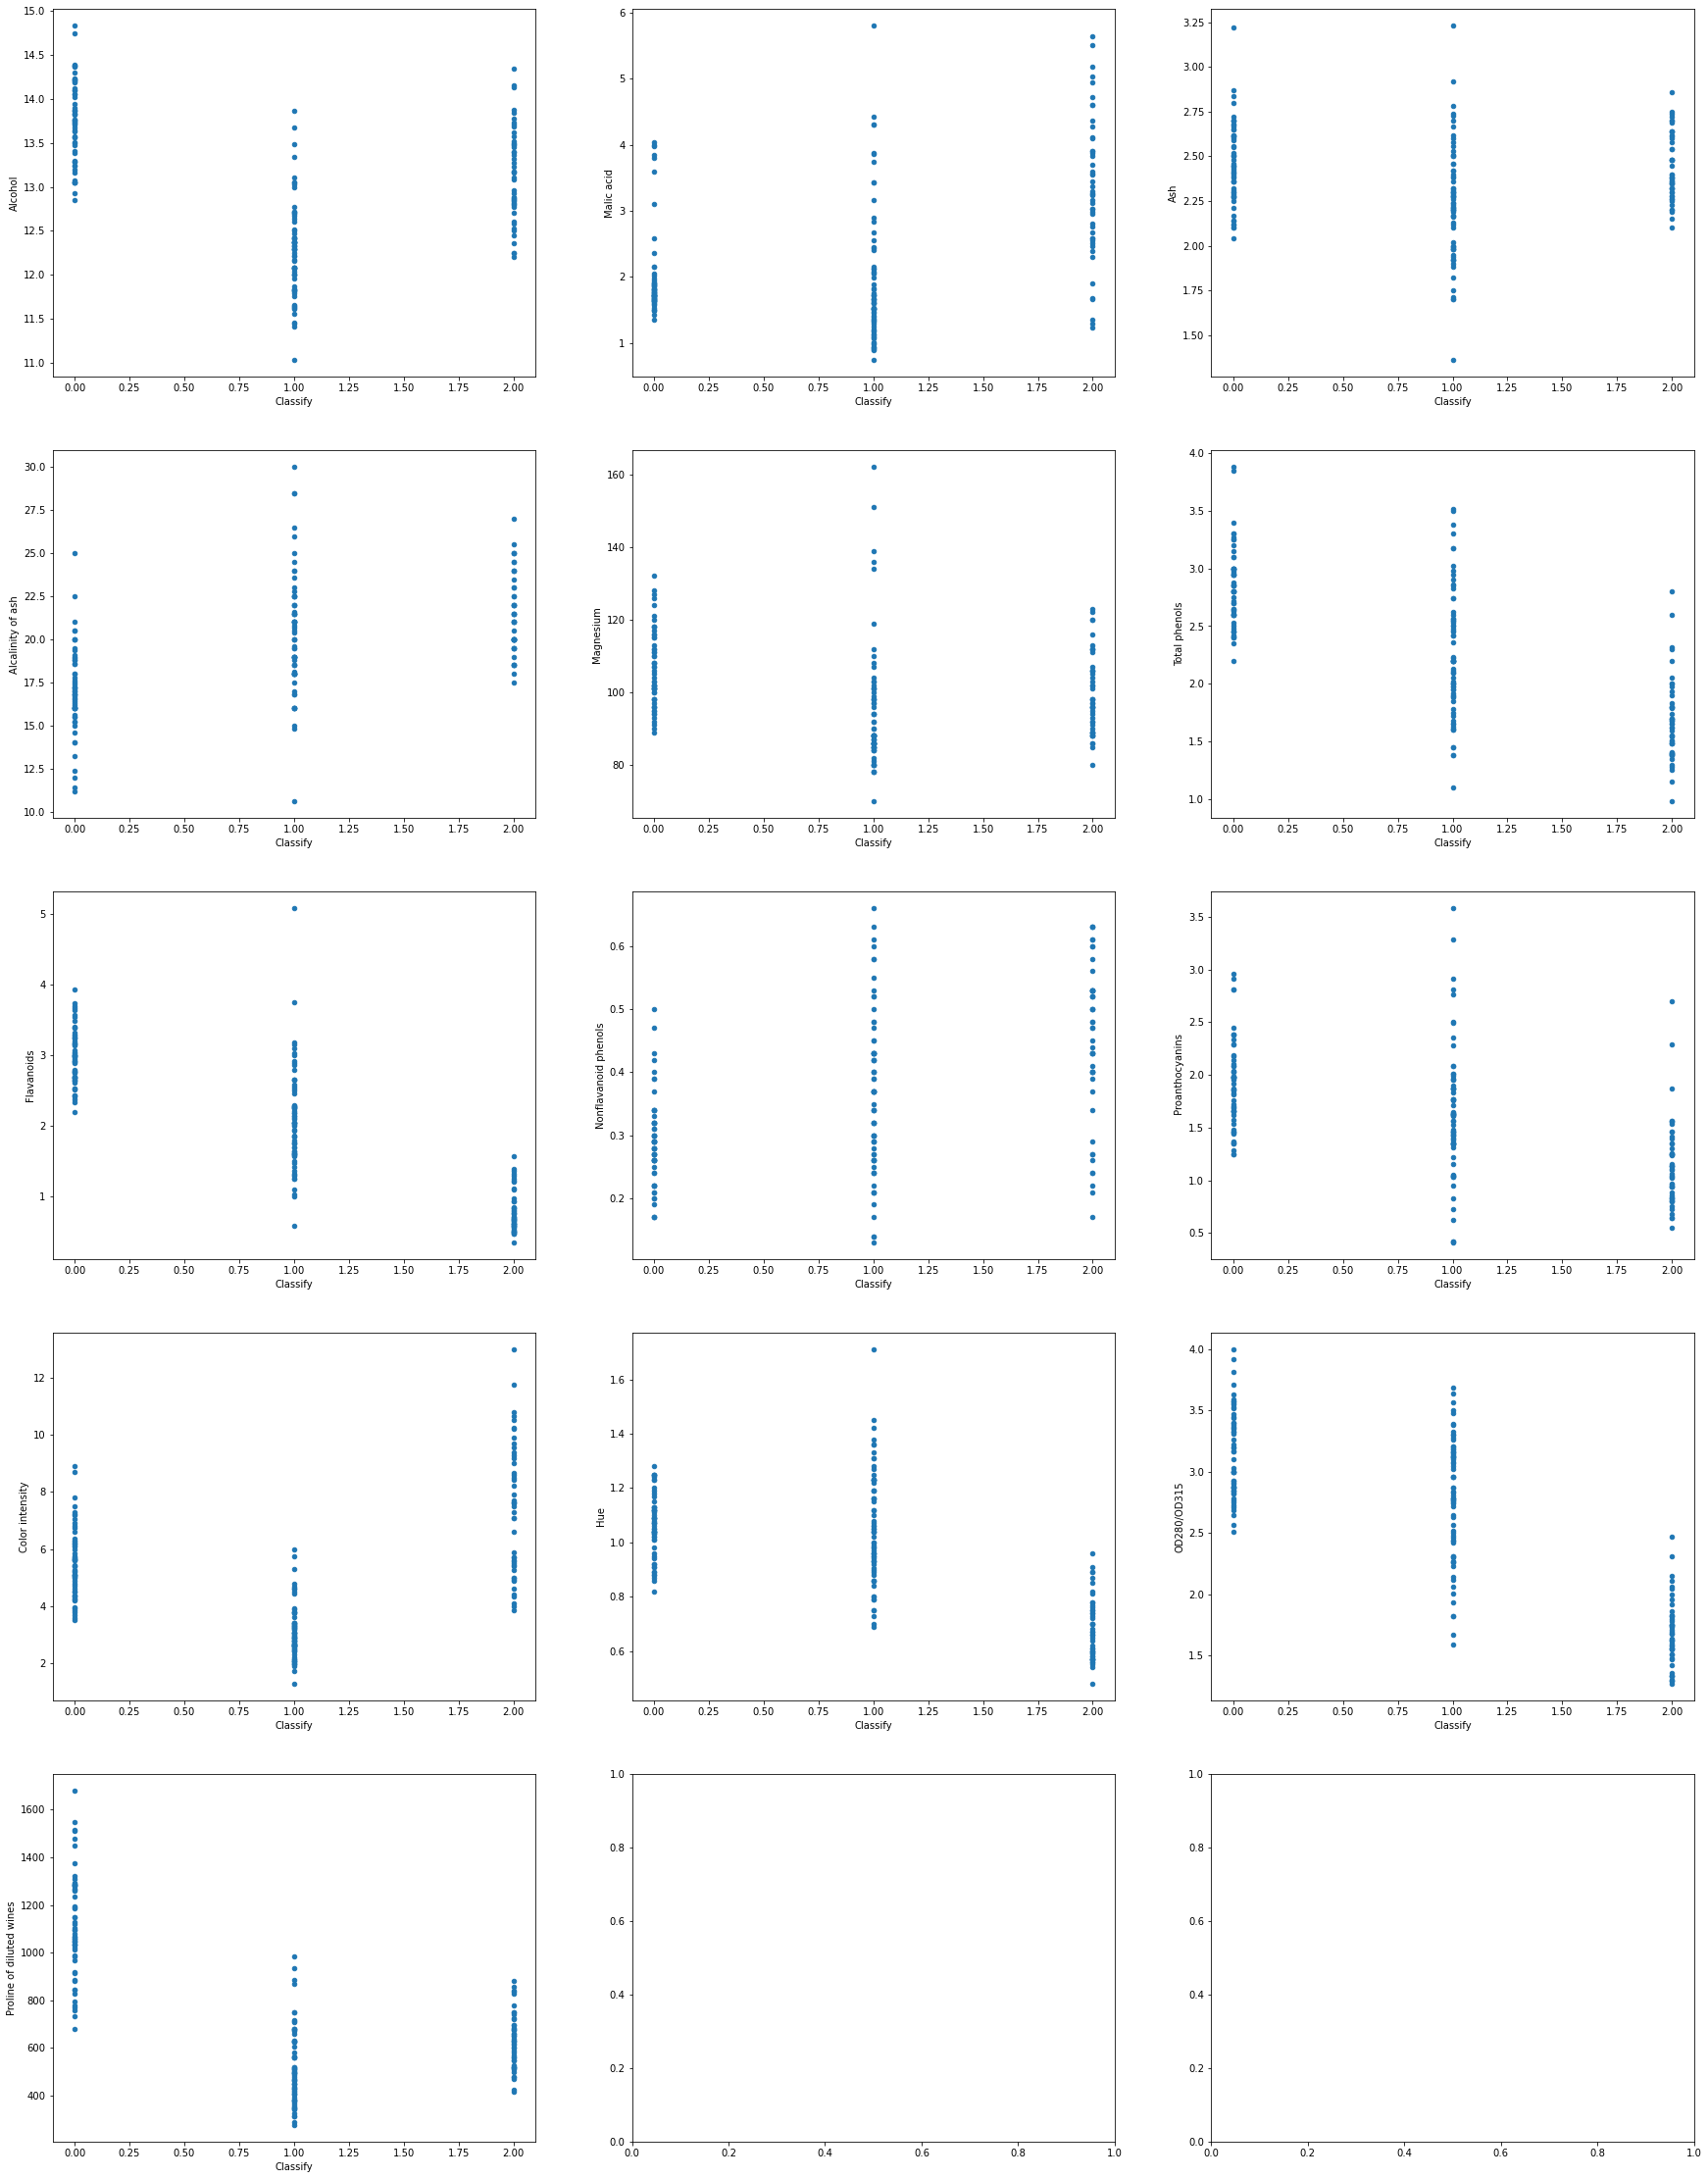

In [4]:
fig, axes = plt.subplots(5, 3)

for i in range(13):
    col = i//3
    row = i % 3
    df.plot(x='Classify', y=i+1, kind = 'scatter', ax = axes[col,row])

plt.rcParams['figure.figsize'] = [30, 40]

warnings.filterwarnings(action='ignore') 

위의 plot으로 볼때, 변수간의 scale이 크게 달라 정규화를 진행하였다.  
추가적으로 Ash, Nonflavanoid phenols 변수는 class를 분류하는데 설명력이 적다고 판단하여 제거 하고 진행하였다.

In [28]:
df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제


scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행


In [29]:
df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])

# merged = pd.concat([df_PCA, df_rabel], axis =1)

In [ ]:
# %matplotlib inline

# # font 정의
# mlp.rcParams['font.size'] = 20
# mlp.rcParams['font.family'] = 'Nanum Gothic'

# # 시각화
# plt.figure(figsize=(16, 9))
# sns.set_palette(sns.color_palette("muted"))

# sns.scatterplot(merged['x'], 
#                      merged['y'], 
#                      hue=merged['Classify'], 
#                      s=100,
#                      palette=sns.color_palette('muted', n_colors=3),
#                     )
# plt.title('wine')



## 3) 군집화 분석
### (1) K-Means
K-Means는 기본적으로 K개의 군집으로 군집화를 진행하기 때문에 군집의 개수를 정해주어야 한다. 원본 데이터에서는 3개를 가지고 진행하지만 원래의 Clustering 과정에서는 군집의 개수를 정하는 것이 중요하다. 따라서 Elbow method를 이용하여 적절한 군집의 개수를 확인하였고, 3 가지로 분류하는 경우 충분히 설득력이 있다는 것을 확인하였다.

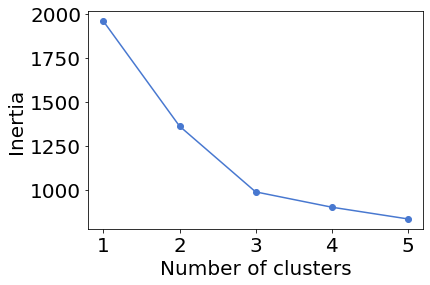

In [30]:
inertia = []
for i in range(1,6):
    kmeans_plus = KMeans(n_clusters = i,random_state = 15,  n_init=100)
    kmeans_plus.fit(df_scale)
    inertia.append(kmeans_plus.inertia_)
    
plt.plot(range(1,6), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

추가적으로 군집을 각각 2~6 으로 수행했을 때의 silhoutte score를 확인해 보면 3개로 분류하는 경우 0.6113655707313156 으로 가장 높다는 것도 확인 할 수 있다.


In [31]:
for i in range(2,6):
    model = KMeans(n_clusters = i, random_state = 15,  n_init=100)
    model.fit(df_scale)
    df_scale['cluster'] = model.fit_predict(df_scale)
    df_cluster = df_scale['cluster']
    df_scale = df_scale.drop('cluster', axis= 1)
    merged = pd.concat([df_PCA, df_cluster], axis =1)
    score_samples = silhouette_samples(merged, df_cluster)
    merged['silhoutte_coeff'] = score_samples
    
    average_score = silhouette_score(merged, merged['cluster'])
    print(i , " = " , average_score)
    merged  = merged.drop('silhoutte_coeff', axis= 1)


2  =  0.4757718083398866
3  =  0.6113655707313156
4  =  0.5093657843743317
5  =  0.5119133136834318


K-Means를 이용해서 2~5개의 군집화를 시도하면 다음과 같이 확인할 수 있다. 

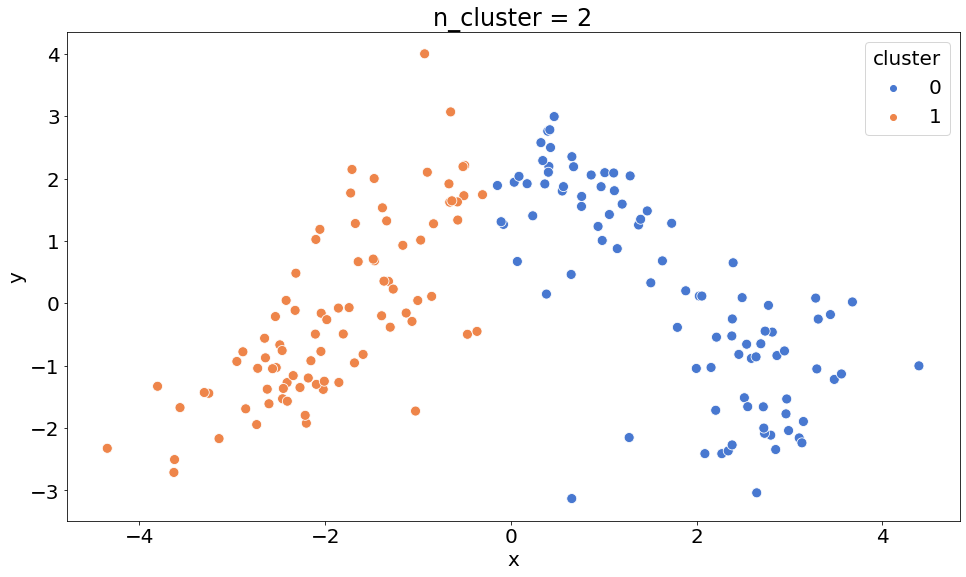

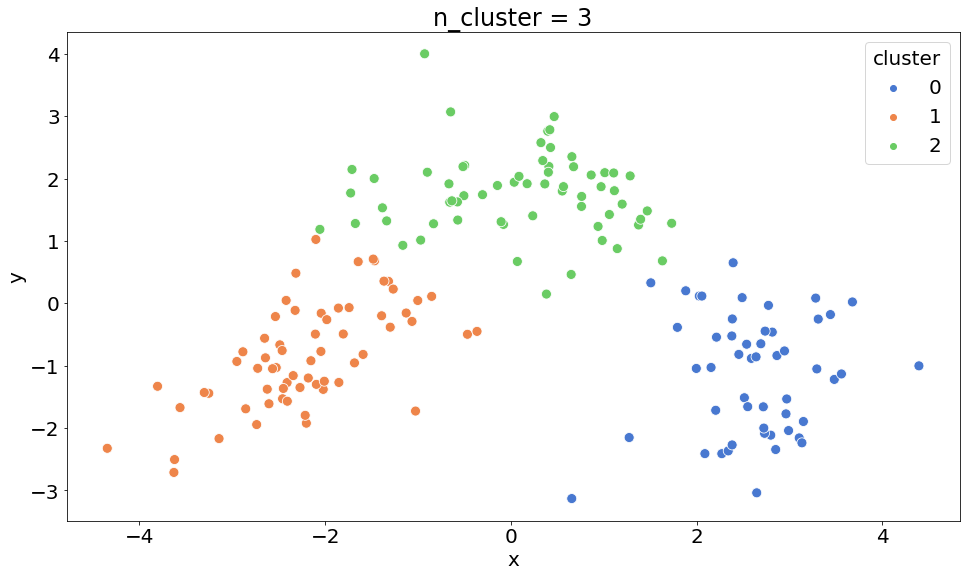

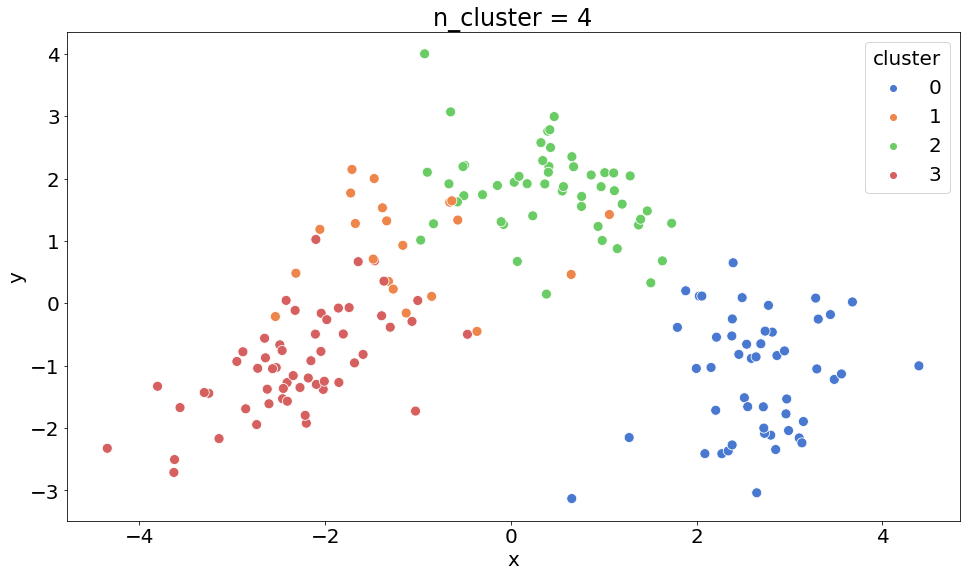

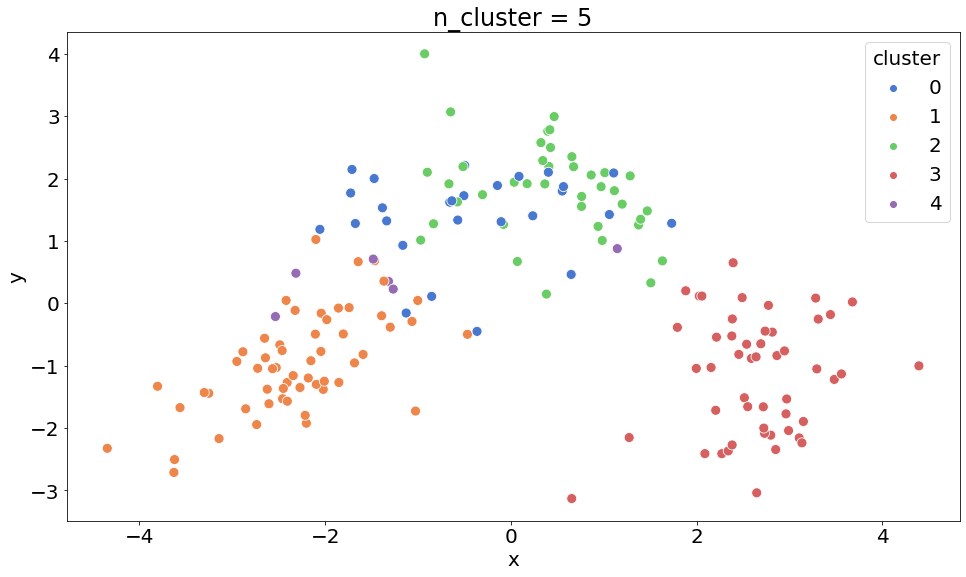

In [32]:
for i in range(2,6):
    model = KMeans(n_clusters = i, random_state = 300,  n_init=100)
    model.fit(df_scale)

    df_scale['cluster'] = model.fit_predict(df_scale)

    df_cluster = df_scale['cluster']

    df_scale = df_scale.drop('cluster', axis= 1)
    
    merged = pd.concat([df_PCA, df_cluster], axis =1)



    %matplotlib inline

    # font 정의
    mlp.rcParams['font.size'] = 20
    mlp.rcParams['font.family'] = 'Nanum Gothic'

    # 시각화
    plt.figure(figsize=(16, 9))
    sns.set_palette(sns.color_palette("muted"))

    sns.scatterplot(merged['x'], 
                         merged['y'], 
                         hue=merged['cluster'], 
                         s=100,
                         palette=sns.color_palette('muted', n_colors=i))
    plt.title('n_cluster = ' + str(i))
    plt.show()

n = 2, 3 일때 합리적인 모습을 보여주며 특히 silhoutte score는 3개로 분류하는 경우 0.6113655707313156으로 가장 높은 것을 확인 할 수 있다. 

### (2) Hierarchical clustering
Hierarchical clustering을 이용해서 Clustering을 진행하여 보자.  
우선 기본데이터 전처리와 PCA를 다시한번 진행하여 준다

In [33]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_rabel = df['Classify'] # 라벨을 df_rabel에 저장하고 

df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거
df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제

scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행

df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])

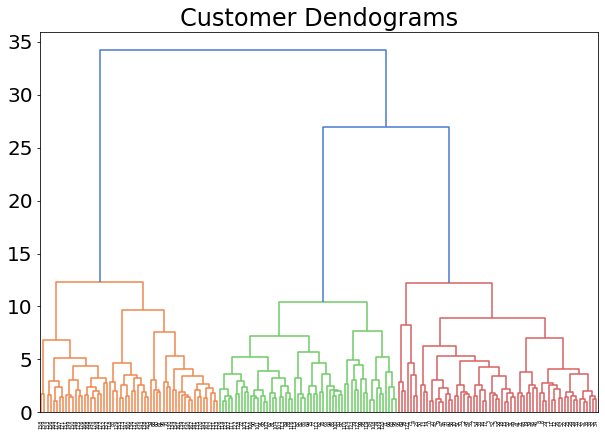

In [34]:
linked = linkage(df_scale, 'single')
plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(df_scale, method='ward'))

In [35]:
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
df['cluster'] = pd.DataFrame( cluster.fit_predict(df_scale))
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

merged = pd.concat([df_PCA, df_cluster], axis =1)

Hierarchical clustering을 진행하고 K-Means에서와 같은 방식으로 predict 내용을 저장, 시각화한다

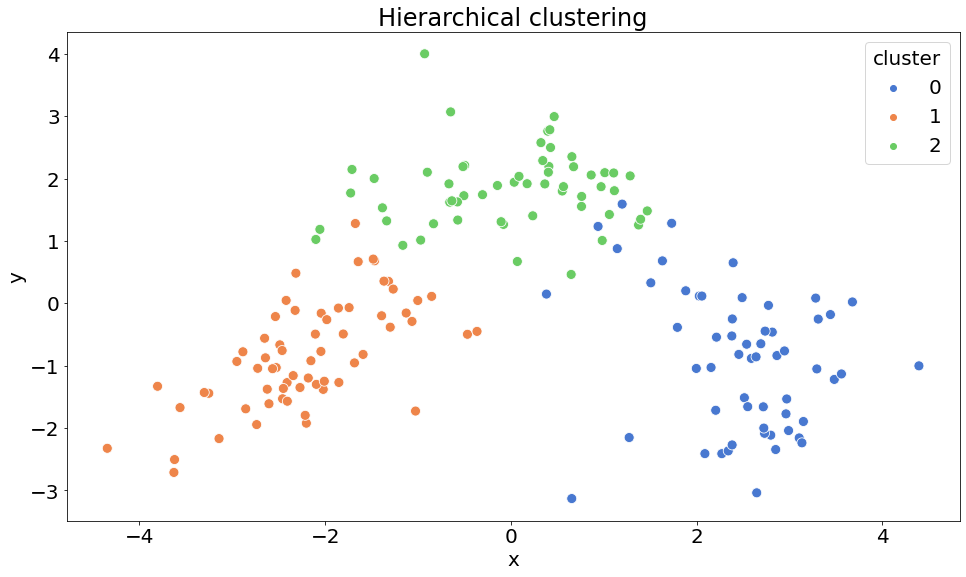

In [36]:
%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Hierarchical clustering')
plt.show()

In [38]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print("silhoutte score" , " = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score  =  0.5873642870266809


Hierarchical clustering 으로 군집화를 진행하는 경우도 K-Means와 유사하며 silhoutte score는 K-Means 보다 소폭 하락한 0.5873642870266809 이다.

### (3) DBSCAN
마지막으로 DBSCAN으로 진행하여 본다.  
이전과 동일하게 데이터를 불러오고, 전처리를 진행해준다

In [52]:
df = pd.read_csv('wine.data', sep=',')
df = df.replace({'Classify': {1:0,2:1,3:2}}) # 1,2,3으로 분류되어 있는 것을 0,1,2로 변환

df_rabel = df['Classify'] # 라벨을 df_rabel에 저장하고 

df = df.drop('Classify', axis= 1)# 우리가 사용할 데이터에서 제거

df = df.drop('Ash', axis= 1)
df = df.drop('Nonflavanoid phenols', axis= 1) #설명력이 작은 데이터 삭제

scaler = StandardScaler()   
df_scale = pd.DataFrame(scaler.fit_transform(df)) #표준화 진행

df_for_PCA = pd.DataFrame(df_scale)
pca = PCA(n_components=2)
df_PCA = pca.fit_transform(df_for_PCA)
df_PCA = pd.DataFrame(df_PCA, columns=["x", "y"])

DBSCAN은 초기 설정값에 의해서 군집의 개수가 자동으로 분류된다. 우선은 eps=2.1,min_samples=15로 진행해 보고자 한다. 

1


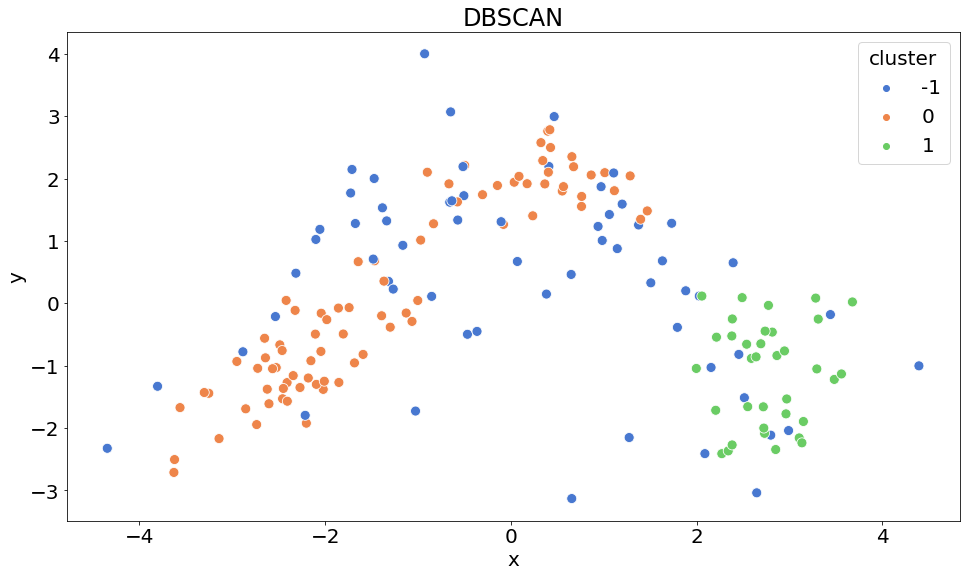

In [60]:
# create model and prediction
model = DBSCAN(eps=2.1,min_samples=15)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()


In [64]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.38087851072714946


위와 같은 파라미터로 진행했을 경우 2개의 군집으로 나뉜다. 좌측 하단에 있는 군집과, 중앙 상단에 있는 두개의 군집을 분리하기 위해서 min_samples를 조금씩 올려 두 군집을 나누려고 시도하였고, 17일때 나눌 수 있었다.   

2


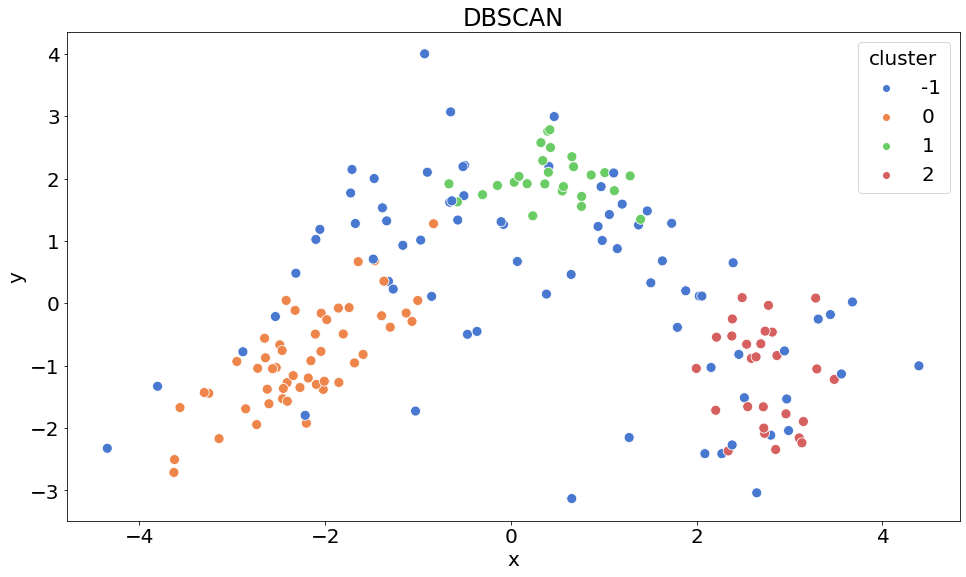

In [62]:
# create model and prediction
model = DBSCAN(eps=2.1,min_samples=17)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()

In [65]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.38087851072714946


다음과 같이 군집화를 진행한 경우 군집이 3개로 분리되며, 실루엣 스코어가 상승하였다. 추가적으로 이상치를 줄이기 위해서 eps 값을 증가시켜 보았고, eps를 증가시키면 다시 2개의 군집으로 병합되는 것을 확인하였다. 이를 해결하기 위해 다시 min_sample을 늘리는 과정을 반복하였다. 개인적으로 최적의 파라미터 값은 eps=2.5,min_samples=33인 경우인 것 같다.

2


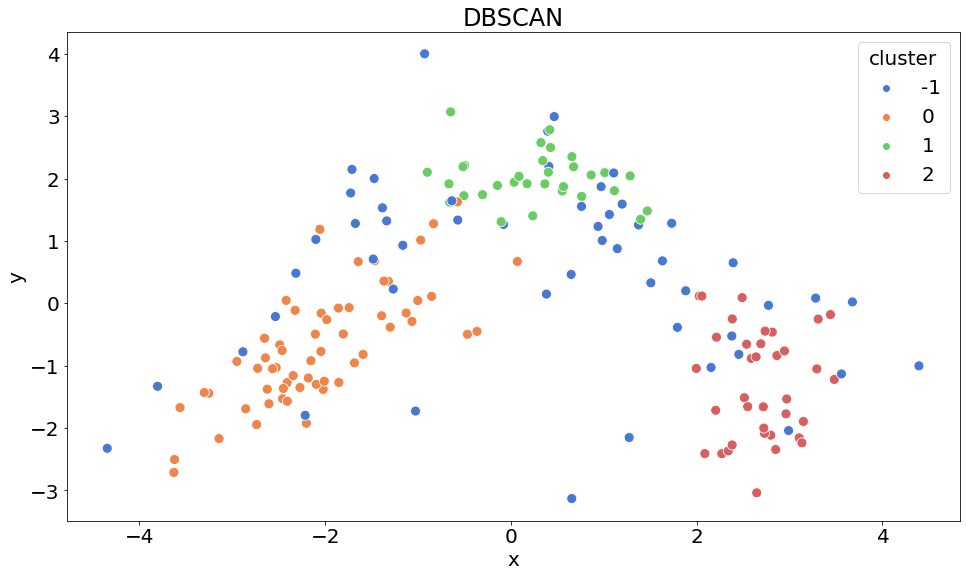

In [110]:
# create model and prediction
model = DBSCAN(eps=2.5,min_samples=33)
predict = pd.DataFrame(model.fit_predict(df_scale))
predict.columns=['predict']

# concatenate labels to df as a new column
r = pd.concat([df_scale,predict],axis=1)

print(r['predict'].max())

df['cluster'] = predict
df_cluster = df['cluster']

df = df.drop('cluster', axis= 1)

type(df_cluster)

merged = pd.concat([df_PCA, df_cluster], axis =1)


# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['cluster'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=r['predict'].max() + 2),
                    )
plt.title('DBSCAN')
plt.show()

In [111]:
score_samples = silhouette_samples(merged, df_cluster)
merged['silhoutte_coeff'] = score_samples

average_score = silhouette_score(merged, merged['cluster'])
print( "silhoutte score = " , average_score)
merged  = merged.drop('silhoutte_coeff', axis= 1)

silhoutte score =  0.42881447451542337


최종적으로 진행한 DBSCAN의 silhoutte score는 0.42881447451542337으로 초기 silhoutte score에 비해 많이 상승한 것을 확인 할 수 있다. 

## 4) 군집화 분석 및 가시화
실제 레이블을 가지고 가시화를 해보면 아래와 같다 

Text(0.5, 1.0, 'Rabel')

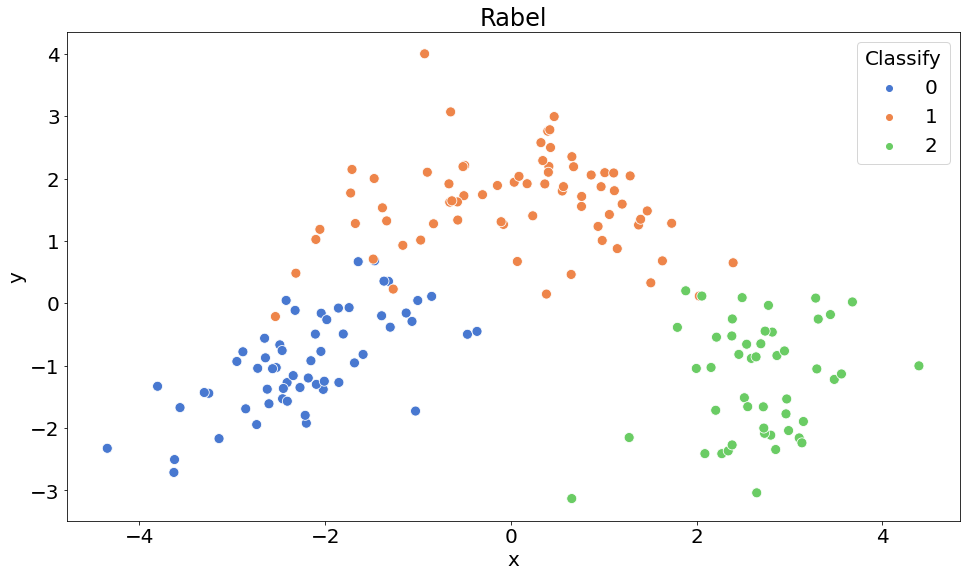

In [113]:
merged = pd.concat([df_PCA, df_rabel], axis =1)

%matplotlib inline

# font 정의
mlp.rcParams['font.size'] = 20
mlp.rcParams['font.family'] = 'Nanum Gothic'

# 시각화
plt.figure(figsize=(16, 9))
sns.set_palette(sns.color_palette("muted"))

sns.scatterplot(merged['x'], 
                     merged['y'], 
                     hue=merged['Classify'], 
                     s=100,
                     palette=sns.color_palette('muted', n_colors=3),
                    )
plt.title('Rabel')


아래는 위에서 각각의 방식으로 진행한 군집화의 결과이다
![nn](https://imgur.com/93YNY7h.png)
![nn](https://imgur.com/gzNtqIE.png)
![nn](https://imgur.com/kcTsiTw.png)

결과를 보았을 때 Rabel을 이용하여 시각화 한 것과, K-Means와 Hierarchical clustering으로 군집화한 것을 비교하면 상당히 유사하다는 것을 확인 할 수 있다.  
다만 해당 데이터에 대해서는 DBSCAN의 위의 두 방법에 비해 적절하지 않아 보이는데, 이는 3개의 군집간의 거리가 멀리 떨어져 있지 않고, 최적의 파라미터를 찾기 어렵기 때문인 것 같다. 추가적으로 변수를 제거하여 PCA를 통해 새로운 축을 만들어 내고, 그결과 군집간의 거리가 유의미하게 차이가 나게 된다면, 더 좋은 성능을 낼 수 있을 것 같다.   